<a href="https://colab.research.google.com/github/nosadaniel/anti_phishing_email_classifier_workflow/blob/main/prepare_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

In [1]:
# Install jupyter and it dependencies
%pip install -q jupyterlab ipywidgets notebook tqdm

# Install core LangChain/LangGraph/LangSmith, LLM support, and utilities
%pip install -q langgraph langchain langsmith langchain_core langchain_google_genai langchain_community langchain_ollama langchain_mistralai

# Install data analysis and visualization libraries
%pip install -q matplotlib seaborn plotly scikit-learn pandas numpy

# # Install some additional libraries for data processing and visualization
# %pip install requests graphviz pygraphviz

# instal datasets
%pip install -q datasets

#install the URl checking tool
%pip install -q sec-mcp

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Update sec-mcp blacklist database

In [2]:
# update the sec-mcp blacklist database
!sec-mcp update

#check sec-mcp status(optional)
!sec-mcp status

Blacklist update triggered.


2025-07-24 21:28:04,018 - httpx - INFO - HTTP Request: GET https://raw.githubusercontent.com/openphish/public_feed/refs/heads/main/feed.txt "HTTP/1.1 200 OK"
2025-07-24 21:28:04,028 - sec_mcp.update_blacklist - INFO - First 5 parsed entries for OpenPhish: [('https://bdoonline.faqs-recommended.workers.dev/bdo-form/aMy2Vl38cskcfBTJD1h0RLJkWQaEQdyATS6q1t2HOT', None, '2025-07-24 21:28:04', 8, 'OpenPhish'), ('http://www.3656qqq.com/', None, '2025-07-24 21:28:04', 8, 'OpenPhish'), ('https://prouttonuseipeu.vercel.app/hiwecroutatro/hiwecrouta.html', None, '2025-07-24 21:28:04', 8, 'OpenPhish'), ('http://ee-payment-help.firebaseapp.com/', None, '2025-07-24 21:28:04', 8, 'OpenPhish'), ('https://form.jotform.com/252042896623056', None, '2025-07-24 21:28:04', 8, 'OpenPhish')]
2025-07-24 21:28:04,761 - sec_mcp.update_blacklist - INFO - Updated OpenPhish: 167 URLs, 129 domains, 0 IPs.
2025-07-24 21:28:04,766 - httpx - INFO - HTTP Request: GET https://urlhaus.abuse.ch/downloads/text/ "HTTP/1.1 200 O

Total entries: 129571
Last update: 0001-01-01 00:00:00
Active sources:
  - CINSSCORE: 24229 entries
  - Dshield: 29 entries
  - SpamhausDROP: 1581 entries
  - PhishTank: 52817 entries
  - BlocklistDE: 32766 entries
  - EmergingThreats: 291 entries
  - OpenPhish: 1154 entries
  - URLhaus: 16704 entries

Per-source breakdown:
Source                Domains       URLs        IPs
--------------------------------------------------
BlocklistDE                 0          0      32766
CINSSCORE                   0          0      24229
Dshield                     0          0         29
EmergingThreats             0          0        291
OpenPhish                 468        686          0
PhishTank               18542      34275          0
SpamhausDROP                0          0       1581
URLhaus                   663      16040          1

Server status: Running (STDIO)


## Load enviroment variables from .env file

In [3]:
import os
from dotenv import load_dotenv  

dotenv_path = os.path.join(os.getcwd(), '.env')
if os.path.exists(dotenv_path):
    print(f".env file found => {dotenv_path}")
    has_loaded = load_dotenv(dotenv_path)
    print(f".env file loaded: {has_loaded}")
else:
    print(".env file not found")
    exit()

# Load environment variables
google_api_key = os.environ.get('GOOGLE_API_KEY')
langsmith_endpoint = os.environ.get('LANGSMITH_ENDPOINT')
langsmith_api_key = os.environ.get('LANGSMITH_API_KEY')
langsmith_tracing = os.environ.get('LANGSMITH_TRACING')
langsmith_project = os.environ.get('LANGSMITH_PROJECT')
mistral_api_key = os.environ.get('MISTRAL_API_KEY')
llm_model = os.environ.get('LLM_MODEL')
llm_provider = os.environ.get('LLM_PROVIDER')


print(llm_provider)
print(llm_model)


.env file found => d:\developer\montimage\anti_phishing_email_classifier_workflow\.env
.env file loaded: True
ollama
llama3.2:3b


## Get LLM model

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_ollama import ChatOllama
from langchain_mistralai import ChatMistralAI
def get_llm():
  try:
    llm = None
    if llm_provider == 'gemini':
      llm = ChatGoogleGenerativeAI(
        model=llm_model, temperature=0.0)
    if llm_provider == "ollama":
      llm = ChatOllama(
        model=llm_model, temperature=0.0, base_url="http://127.0.0.1:11434")
    if llm_provider == "mistral":
      llm = ChatMistralAI(
        model=llm_model, temperature=0, max_retries=2)
    if llm is None:
      raise Exception("Invalid LLM provider name")
    return llm
  except Exception as e:
    print(f"Error getting LLM: {e}")
    raise e

# example
llm = get_llm()
if llm is not None:
  print(f"LLM: {llm}")
  messages = [
                ("system", "Translate the user sentence to French."),
                ("human", "I love programming."),
            ]
  result = llm.invoke(messages)

  print(result.content)


LLM: model='llama3.2:3b' temperature=0.0 base_url='http://127.0.0.1:11434'
Je aime programmer.


2025-07-24 21:40:39,917 - langsmith.client - WARNING - Failed to send compressed multipart ingest: langsmith.utils.LangSmithRateLimitError: Rate limit exceeded for https://api.smith.langchain.com/runs/multipart. HTTPError('429 Client Error: Too Many Requests for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Too many requests: tenant exceeded usage limits: Monthly unique traces usage limit exceeded"}\n')trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=8fd84903-ce71-45bf-85ae-a07bff160f13; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=37747edc-f463-4091-8460-ffcf2693f02a; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=492994f0-9d2b-496b-82f4-9de150492f89; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=3803ccd8-34c9-4b22-8389-f1c83fa51fe7; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=0c3a8748-445b-4b32-ac9e-87df08115fd9; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=0c3a8748-445b-4b32-ac9e-87df08115fd9; trace=bae1420f-c109-45d3-932e-6cfd66a12162,id=c8068506-eb58-4dcc-ba4c-7

### load all .csv dataset files

In [5]:
from pathlib import Path
from typing import List

#get all available datasets files
def get_all_available_dataset_files()->List[str]:
  try:
    # Define path to the dataset directory
    dataset_dir = Path('datasets')
    #list available datasets
    available_datasets = [file for file in dataset_dir.glob('*.csv')]
    return available_datasets
  except Exception as e:
    print(f"Error getting available datasets: {e}")
    raise e

# usage
available_datasets = get_all_available_dataset_files()
for dataset in available_datasets:
    print(f"Available dataset: {dataset}")

Available dataset: datasets\CEAS_08.csv
Available dataset: datasets\Nazario.csv
Available dataset: datasets\Nigerian_Fraud.csv
Available dataset: datasets\SpamAssasin.csv


### Load  dataset helpers function

In [6]:
# load dataset into
from datasets import load_dataset, DatasetDict, Dataset, IterableDatasetDict, IterableDataset

# load each dataset file
def load_local_dataset(type, path:str)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset | None:
  try:
    dataset = load_dataset(type, data_files=path,split='train')
  except Exception as e:
    print(f"Error loading dataset: {e}")
    return None
  return dataset


# filter each dataset by label
def filter_dataset_by_label(dataset, label_value:int=None)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset:
  if label_value is None:
    return dataset
  else:
    data = dataset.filter(lambda x: x['label'] == label_value)
    print(f"Number of {'phishing' if label_value == 1 else 'legitimate'} emails=> {len(data)}")
    return data 

# limit dataset range
def limit_dataset_range(dataset, limit:int=None)-> DatasetDict | Dataset | IterableDatasetDict | IterableDataset:
  if limit is None:
    return dataset
  else:
    data = dataset.select(range(limit))
    return data


In [7]:
# get phishing and non phishing emails
def get_dataset_from_files(limit:int = None, label:int = None):
    # all dataset files
    all_dataset_files = get_all_available_dataset_files()
    dataset_list = []
    for file in all_dataset_files:
        # load each file dataset
        loaded_dataset = load_local_dataset('csv', f"{file}")
        # filter the loaded dataset by label
        filter_dataset = filter_dataset_by_label(loaded_dataset, label)

        # limit the range of the dataset
        limit_dataset = limit_dataset_range(filter_dataset, limit)

        # add to a list
        label_text = "legitimate" if label==0 else "phishing"
        dataset_list.append({"data":limit_dataset, "file_name":file.name.lower(), "label": None if label is None else label_text, "total_number":len(limit_dataset)})
    return dataset_list


#get only 10
all_legitimate_dataset_10 = get_dataset_from_files(label=0, limit=10); 
all_phishing_dataset_10 = get_dataset_from_files(label=1, limit=10)

all_legitimate_dataset= get_dataset_from_files(label=0); 
all_phishing_dataset = get_dataset_from_files(label=1); 

# print(f"10_legitimate_dataset => {all_legitimate_dataset_10}")
# print(f"10_phishing_dataset=> {all_phishing_dataset_10}")

# print(f"all_legitimate_dataset => {all_legitimate_dataset}")
# print(f"all_phishing_dataset=> {all_phishing_dataset}")
print(f"all_email => {get_dataset_from_files()}")



Number of legitimate emails=> 17312
Number of legitimate emails=> 0
Number of legitimate emails=> 0
Number of legitimate emails=> 4091
Number of phishing emails=> 21842
Number of phishing emails=> 1565
Number of phishing emails=> 3332
Number of phishing emails=> 1718
Number of legitimate emails=> 17312
Number of legitimate emails=> 0
Number of legitimate emails=> 0
Number of legitimate emails=> 4091
Number of phishing emails=> 21842
Number of phishing emails=> 1565
Number of phishing emails=> 3332
Number of phishing emails=> 1718
all_email => [{'data': Dataset({
    features: ['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'],
    num_rows: 39154
}), 'file_name': 'ceas_08.csv', 'label': None, 'total_number': 39154}, {'data': Dataset({
    features: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'],
    num_rows: 1565
}), 'file_name': 'nazario.csv', 'label': None, 'total_number': 1565}, {'data': Dataset({
    features: ['sender', 'receiver', 'date', 'sub

In [8]:
# only get legit email dataset that are not empty
def get_all_legit_email_dataset():
    all_legit_email_data = []
    for legit in all_phishing_dataset_10:
        data = legit['data']
        #print(data)
        if data.num_rows > 0:
            #rint(f"onlylegit=>{legit['data']}")
            all_legit_email_data.append(data)
    return all_legit_email_data

# only get phishing email dataset that are not empty
def get_all_phishing_email_dataset():
    all_phishing_email_data = []
    for phishing in all_phishing_dataset_10: 
        data = phishing['data']
        #print(data)
        if data.num_rows > 0:
           #print(f"onlyphishing=>{phishing['data']}")
            all_phishing_email_data.append(data)
    return all_phishing_email_data
# all email dataet
def get_all_email_dataset_object():
    all_legit_email_data = []
    for legit in get_dataset_from_files():
        data = legit['data']
        #print(data)
        if data.num_rows > 0:
            #rint(f"onlylegit=>{legit['data']}")
            all_legit_email_data.append(data)
    return all_legit_email_data
    
# print(f"get_all_legit_email_dataset => {get_all_legit_email_dataset()}")
# print(f"get_all_phishing_email_dataset => {get_all_phishing_email_dataset()}")
# print(f"get_all_email_dataset_object => {get_all_email_dataset_object()}")


In [9]:
from datasets import concatenate_datasets, Dataset
from typing import List

# All datasets must have the same column names in the same order for concatenate_datasets to work without issues.
def combine_datasets(dataset_list: List[Dataset]) -> Dataset:
    # Ensure all datasets have the same column order (optional but recommended for consistency)
    first_columns = dataset_list[0].column_names
    aligned_datasets = [
        ds.rename_columns({col: col for col in ds.column_names})  # Force reordering to match
        .map(lambda x: x, remove_columns=[col for col in ds.column_names if col not in first_columns])
        .cast(dataset_list[0].features)  # Align feature types if needed
        if ds.column_names != first_columns else ds
        for ds in dataset_list
    ]

    combined_dataset = concatenate_datasets(aligned_datasets)
    return combined_dataset

In [10]:
#combine in a single dataset
# combined_legit_email_dataset = combine_datasets(get_all_legit_email_dataset()).select(range(100))
# combined_phishing_email_dataset = combine_datasets(get_all_phishing_email_dataset()).select(range(100))
combined_legit_email_dataset = combine_datasets(get_all_legit_email_dataset())
combined_phishing_email_dataset = combine_datasets(get_all_phishing_email_dataset())
all_emails_dataset_only = combine_datasets(get_all_email_dataset_object())


# print(f"legit_email_dataset=> {combined_legit_email_dataset}")
# print(f"phishing_email_dataset=> {combined_phishing_email_dataset}")
# print(f"all_emails_dataset_only=> {all_emails_dataset_only}")


# Some Helpers Functions

In [11]:
import re
from typing import Tuple, Optional

def extract_email_username(email_string: Optional[str]) -> Tuple[Optional[str], Optional[str]]:
    """
    Extracts the first email and the associated name (if any) from a string.

    Args:
        email_string: The input string.

    Returns:
        A tuple of (email, username). Username may be None if not found.
    """
    if not email_string:
        return None, None

    # Pattern: Name <email>
    match = re.search(r'([\w\s\"\'\-\.]+)?<?([\w\.\-+]+@[\w\.\-]+\.\w+)>?', email_string)
    if match:
        name = match.group(1)
        email = match.group(2)
        name = name.strip() if name else None
        return email, name

    return None, None

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   #print(data['sender'])
#   email,username = extract_email_username(data['sender'])
#   if email and username:
#     print(f"Email: {email}, Username: {username}")
#   elif email:
#     print(f"Email: {email}, Not Username found")
#   else:
#     print(data['sender'], "No email or username found")

In [12]:

def extract_url_from_body(message_body: str,is_url:int) -> str | None:
  """
  Extracts a URL from a string only when is_url is true.

  Args:
    message_body: The input string.

  Returns:
    The extracted URL, or None if not found.
  """
  if (is_url == 1):
      url_match = re.search(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', message_body)
      if url_match:
          return url_match.group(0)
  return None

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   url = extract_url_from_body(data['body'],data['urls'])
#   if url:
#     print(url)


In [13]:
import re
from typing import List # Import List for type hinting

def extract_email_from_body(message_body: str) -> List[str]:
  """
  Extracts all unique email addresses from a message body using a comprehensive regex.

  Args:
    message_body: The input string (message body).

  Returns:
    A list of unique extracted email addresses. Returns an empty list if none are found.
  """
  # Add a check for None input
  if message_body is None:
      return []

  # More comprehensive regex for email extraction using findall
  email_list = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', message_body)

  # Remove duplicates by converting to a set and back to a list
  unique_emails = list(set(email_list))

  return unique_emails


# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   emails = extract_email_from_body(data['body'])
#   if emails:
#     print(f"Unique Emails extracted: {emails}")

In [14]:
def is_phishing(label:int)->bool:
  if(label == 1):
    return True
  return False

# #example with legitimate dataset
# for data in combined_legit_email_dataset:
#   is_phishing_email = is_phishing(data['label'])
#   print(f"is_phishing: {is_phishing_email}")

Define a structure data for the email database

In [15]:
#define class model
from typing import List, Optional, TypedDict
from pydantic import BaseModel, Field # Import Field

class EmailDataSet(BaseModel):
  is_phishing: bool = Field(..., description="Boolean indicating if the email is labeled as phishing in the dataset.")
  sender_name: str | None = Field(None, description="The name of the email sender, if extracted.") # Allow sender_name to be None as extract_email_username can return None for name
  sender_email: str = Field(..., description="The email address of the sender.") # Made mandatory
  receiver_email: str = Field(..., description="The email address of the receiver.") # Made mandatory
  date: str = Field(..., description="The date the email was sent or received.") # Made mandatory
  subject: str = Field(..., description="The subject line of the email.") # Made mandatory
  body: str = Field(..., description="The main body content of the email.") # Made mandatory
  urls: List[str] = Field([], description="A list of URLs extracted from the email body.")
  extra_emails: List[str] = Field([], description="A list of unique email addresses found within the email body.")


class UrlCheckResult(BaseModel):
  is_malicious: bool = Field(..., description="Boolean indicating if the URL was flagged as malicious by the security checker.")
  url: str = Field(..., description="The URL that was checked.")
  confidence: float = Field(..., description="Confidence score (0.0 to 1.0) for the maliciousness check.") # 0.0 to 1.0
  details: Optional[str] = Field(None, description="Optional details or explanation from the security checker.") # Explanation from sec-mcp

# final output structure from the analysis agent
class AnalysisResult(BaseModel):
  is_phishing: bool = Field(..., description="Boolean indicating if the email is labeled as phishing in the dataset.")
  trust_score: int = Field(..., description="Trust score (0 to 100) for the email.") # 0 to 100
  explanation: str = Field(..., description="Explanation why it is phishing or not phishing.")
  recommendation: str = Field(..., description="Recommendation to the user.")
  urls: List[str] = Field([], description="A list of URLs extracted from the email body.")
  url_check_results: List[UrlCheckResult] = Field([], description="A list of UrlCheckResult objects for malicious URLs found in the email.")



format the dataset and return a list of structured email data


In [16]:
from typing import List
from datasets import Dataset


def format_dataset(dataset: Dataset) -> List[EmailDataSet]:
  emails_data: List[EmailDataSet] = [] # Initialize as an empty list
  try:
      for data in dataset:
        urls = []  # Initialize for each email
        # emails_in_body = [] # Initialize for each email - This will now be assigned the list directly

        # Use .get() with a default value for potentially missing or None fields
        # Use "" for strings, [] for lists, 0 for integers, False for booleans etc.
        sender_val = data.get('sender', '')
        sender_email, sender_name = extract_email_username(sender_val) # Pass the potentially default value to the helper

        receiver_email_val = data.get("receiver", "") # Get value with default
        date_received_val = data.get("date", "") # Get value with default
        subject_val = data.get("subject", "") # Get value with default
        body_val = data.get("body", "") # Get value with default
        urls_flag_val = data.get('urls', 0) # Default to 0 for urls flag
        label_val = data.get('label', 0) # Default to 0 for label


        url_inside_body = extract_url_from_body(body_val, urls_flag_val) # Use the potentially defaulted body_val and urls_flag_val

        is_phish = is_phishing(label_val) # Use the potentially defaulted label_val


        if url_inside_body:
          urls.append(url_inside_body)

        # Use the updated extract_email_from_body function
        emails_in_body = extract_email_from_body(body_val) # Use the potentially defaulted body_val
        # No need to append to emails_in_body here as extract_email_from_body already returns a list

        email_data_item = EmailDataSet( # Use a different variable name to avoid confusion
          sender_name=sender_name if sender_name is not None else "", # Ensure sender_name is string or ""
          sender_email=sender_email if sender_email is not None else "", # Ensure sender_email is string or ""
          receiver_email=receiver_email_val if receiver_email_val is not None else "", # Explicitly check and default
          date=date_received_val if date_received_val is not None else "", # Explicitly check and default
          subject=subject_val if subject_val is not None else "", # Explicitly check and default
          body=body_val if body_val is not None else "", # Explicitly check and default
          urls=urls, # urls list will be handled correctly even if body was None
          extra_emails=emails_in_body, # Assign the list of unique emails directly, handled by extract_email_from_body's None check
          is_phishing=is_phish
        )
        emails_data.append(email_data_item)

      return emails_data
  except Exception as e:
    error = f"Error formatting dataset: {e}"
    print(error)
    return []


# # examples
# #example with legitimate dataset
# formatted_dataset = format_dataset(combined_legit_email_dataset)
# for data in formatted_dataset:
#   print(data)


Function to check if urls are malicious

In [17]:
from operator import is_
from sec_mcp import SecMCP
# initialize SecMCP once
sec_mcp_checker = SecMCP()
def check_urls_tool(urls: List[str]) -> List[UrlCheckResult]:
  """check a list of URLs against security blacklist using the sec_mcp
    library. Return a list of check results, one for each URL.
  """
  if not urls: # Corrected condition to check if the list is empty
    return []

  #print(f"checking {len(urls)} URLs: {urls}")
  results = []
  try:
    # use batch checking for efficiency
    batch_results = sec_mcp_checker.check_batch(urls)
    for i, url in enumerate(urls):
      #
      if i < len(batch_results):
        check_result = batch_results[i]
        is_malicious = check_result.blacklisted
        confidence = 1.0 if is_malicious else 0.5
        details = check_result.explanation
        results.append({
          'url': url,
          'is_malicious': is_malicious,
          'confidence': confidence,
          'details': details
        })
      else: # Handle potential mismatch in results length (unlikely but safe)
          results.append({
            'url': url,
            'is_malicious': False,
            'confidence': 0.0,
            'details': "Check result unavalable"
          })
    return results
  except Exception as e:
    # Return default safe results on error
    error_results = [{
      'url': url,
      'is_malicious': False,
      'confidence': 0.0,
      'details': f"Error checking URL: {str(e)}"
    } for url in urls]
    print(f"Error checking URL: {error_results}")
    return error_results

# # Example Test:
# formatted_dataset = format_dataset(combined_legit_email_dataset)
# # Flatten the list of lists of URLs into a single list of URLs
# urls_to_check = [url for data in formatted_dataset for url in data.urls]
# check_urls_result = check_urls_tool(urls_to_check)
# for result in check_urls_result:

  print(f"url_checker => {result}")
# or do this
#for data in formatted_dataset:
 # if data.urls:
  #  urls_results = check_malicious_urls(data.urls)
   # print(f"urls results: {urls_results}")

create an ai prompt template

In [18]:
from langchain.schema import HumanMessage, SystemMessage, AIMessage

def get_system_prompt() -> SystemMessage:
  system_message = """
    You are a cybersecurity expert specialized in analyzing emails for phishing attempts.

    Your goal is to determine if an email is phishing (is_phishing: true) or legitimate (is_phishing: false) 
    and provide a confidence score (trusted_score: 0-100, where 0 is highly likely phishing, 100 is highly likely legitimate).

    You have access to ONE tool:
      - check_urls_tool(url_list: List[str]) - List[UrlCheckResult]: Checks a list of URLs against security blacklists.
        Each result indicates if the URL is malicious and provides details.

    Analysis Steps:
    1. Examine sender address: Does it look authentic? Spoofed? From a suspicious domain?
    2. Analyze subject line: Urgency? Generic greetings? Weird characters? Misspellings?
    3. Read the body content: Look for urgency/pressure tactics, grammar/spelling errors, requests for sensitive information (credentials, PII), suspicious offers, mismatched links (text vs. actual URL if available).
    4. Analyze URLs:
      - Identify ALL uRLs present in the email body text
      - if URLs are present, **you MUST call `check_urls_tool`** with the complete list of 
        identified URLs.
      - Integrate the `check_urls_tool` results into your analysis. Are any URLs flagged as malicious?
        Do the domains look legitimate or are they typosquatting/impersonating known brands? Does the path look suspicious?
    5. Synthesize findings: Combine evidence from sender, subject, body, and URL checks. A single indicator might not be conclusive, but multiple red flags increase the likelihood of phishing.
    6. Assign Trust Score: Based on the overall evidence, assign a score from 0 (definitely phishing) to 100 (definitely legitimate).

  """
  return SystemMessage(content=system_message)

def get_message_template(email_data_set: EmailDataSet ) -> List[HumanMessage]:
  # Use f-string for clean formatting
  input_email_section = f"""Analyze the following email:
    <input_email>
    From: {email_data_set.sender_email}
    Subject: {email_data_set.subject}

    Body:
    -------
    {email_data_set.body}
    -------

    additional_emails: {email_data_set.extra_emails}

    URLs Identified in Body: {email_data_set.urls if email_data_set.urls else "No URLs identified"}
    </input_email>
  """


  messages = [
    HumanMessage(content=input_email_section),
  ]
 
  return messages

# #example
# email_data_set =  format_dataset(combined_legit_email_dataset)
# system_message = get_system_prompt()
# print("==system_message== ")
# print(system_message.content)
# for result in email_data_set:
#   message_template = get_message_template(result)
#   print(f"message_template => {message_template}")

use llm to generate the response

In [19]:
from langgraph.prebuilt import create_react_agent
def email_analyzer_agent():
    try:
      llm = get_llm()
      system_prompt = get_system_prompt()
      agent = create_react_agent(model=llm, tools=[check_urls_tool], name="EmailAnalyzerAgent", prompt=system_prompt.content, response_format=AnalysisResult )
      return agent
    except Exception as e:
      print(f"Error creating agent: {e}")
      return None

In [20]:
# use the llm to generate the training data
from datetime import datetime
from typing import List, Dict
def run_llm(dataset:List[EmailDataSet])-> List[Dict] | None:
  ai_response_data = []
  try:
    #llm = get_llm()
    agent = email_analyzer_agent()
    # only loop through 1 email for testing
    for data in dataset:
      # get prompt template
      message_template = get_message_template(data)
      #print(f"Message template: {message_template}")
      response = agent.invoke({"messages":message_template})
      
      real_human_input = message_template[0].content
      real_ai_output: AnalysisResult = response['structured_response']
      #add to list
      ai_response_data.append({
          "email_input": real_human_input,
          "llm_output": real_ai_output.model_dump_json(),
          "llm_model": llm_model
      })
    return ai_response_data
  except Exception as e:
    print(f"Error running agent: {e}")
    return None



In [59]:
def save_training_data(data: EmailDataSet, analysis_result: AnalysisResult, is_correct: bool, file: TextIO) -> None:
    try:
        timestamp = datetime.now().strftime("%Y%m%d_%H:%M:%S")

        json_data = {
            "analysis_timestamp": timestamp,
            "input": data.model_dump(),  # 👈 or data.dict() if using pydantic/dataclass
            "output": analysis_result.model_dump(),
            "evaluation": {
                "actual_label": data.is_phishing,
                "predicted_label": analysis_result.is_phishing,
                "is_correct": is_correct
            }
        }

        json.dump(json_data, file)
        file.write('\n')  # Add newline to separate JSONL entries
        print(f"Data appended to file: {file.name}")
    except Exception as e:
        print(f"Error saving training data: {e}")


In [ ]:
#save training data
import json
import os
from datetime import datetime

def added_data_to_jsonl(email_data: EmailDataSet, analysis_result: AnalysisResult, is_correct: bool, file_name:str)->str | None:
  """
  Generic function to add data to a JSONL file and return the file path
  """
  try:
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    full_file_name = f"{file_name}_{timestamp}.jsonl"
    dir_name = "llm_dataset"
    file_path = os.path.join(dir_name, full_file_name)

    #ensure directory exists before opening file
    os.makedirs(dir_name, exist_ok=True)

    #Now safely open and append data
    with open(file_path, 'a', encoding='utf-8') as file:
      save_training_data(email_data, analysis_result, is_correct, file)
    return file_path
  except Exception as e:
    print(f"Error writing to JSONL file: {str(e)}")
    return None
  


## Anti Phishing Email Classifier Workflow


In [62]:
from typing import Optional, TypedDict


class WorkflowState(TypedDict):
    input: EmailDataSet
    output: Optional[AnalysisResult] # LLm generated output
    is_output_correct: Optional[bool] # valid output.is_phishing with input.is_phishing, when compare to the input_decision
    llm_dataset_path: Optional[str]
    error: Optional[str]

In [63]:
# Define the Nodes
# node for analyze legitimate emaildata set
def analyze_email_dataset(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        agent = email_analyzer_agent()
        # get prompt template
        message_template = get_message_template(input)
        #print(f"Message template: {message_template}")
        response = agent.invoke({"messages":message_template})
        ai_response =  response['structured_response']
        return {"output": ai_response, "error": None}
    except Exception as e:
        print(f"Error in analyze_legitimate node: {e}")
        err_result = AnalysisResult(
                    is_phishing=False, 
                    trust_score=0, 
                    explaination=f"[Analysis Error: Agent execution failed: {str(e)}]",
                    recommendation = "Proceed with extreme caution.",
                    urls = [],
                    url_check_result = []
                )
                    
        return {"output": err_result, "error": str(e)}
# node to validate output
def validate_output(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        output = state.get("output")
        err = state.get("error")
        if err is None:
            output_is_phishing = output.is_phishing
            input_is_phishing = input.is_phishing
            is_valid = output_is_phishing == input_is_phishing
            return {"is_output_correct": is_valid, "error": None}
    except Exception as e:
        print(f"Error in validate_output node: {e}")
        return {"is_output_correct": False, "error": str(e)}

# node for training data set
def store_output_data(state: WorkflowState)-> dict:
    try:
        input = state.get("input")
        analysis_result = state.get("output")
        is_output_correct = state.get("is_output_correct")
        if is_output_correct:
            #store the output in a file
            is_added = added_data_to_jsonl(input,analysis_result,is_output_correct,f"valid_{llm_model}_generated_dataset")
            if is_added is not None:
                return {"llm_dataset_path": is_added, "error": None}
            else:
                return {"llm_dataset_path": None, "error": "Failed to add valid data to JSONL file"}
        else:
            is_added = added_data_to_jsonl(input,analysis_result,is_output_correct,f"invalid_{llm_model}_generated_dataset")
            if is_added is not None:
                return {"llm_dataset_path": is_added, "error": None}
            else:
                return {"llm_dataset_path": None, "error": "Failed to add invaliddata to JSONL file"}
    except Exception as e:
        print(f"Error in store_correct_output node: {e}")
        return {"llm_dataset_path": None, "error": str(e)}

    


LangGraph workflow created successfully


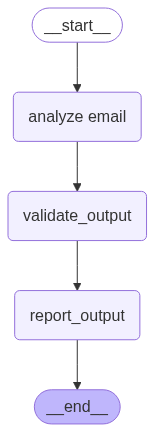

In [64]:
#Create the workfow state machine

from langgraph.graph.state import StateGraph, END, CompiledStateGraph

def create_workflow()-> CompiledStateGraph:
    try:
        workflow = StateGraph(WorkflowState)
        # Add nodes to the graph
        workflow.add_node("analyze email", analyze_email_dataset)
        workflow.add_node("validate_output", validate_output)
        workflow.add_node("report_output", store_output_data)

        # Define the flow of execution
        workflow.set_entry_point("analyze email")
        workflow.add_edge("analyze email", "validate_output")
        workflow.add_edge("validate_output", "report_output")
        workflow.add_edge("report_output", END)

        email_analyzer_app = workflow.compile()
        print("LangGraph workflow created successfully")
        return email_analyzer_app
    except Exception as e:
        print(f"Error creating workflow: {e}")
        traceback.print_exc()
        return None 
#test
create_workflow()

# Complete flow

In [66]:
from typing import List, Dict, Any
from datasets import Dataset
def run_anti_phishing_email_classifier_workflow(dataset: Dataset)->List[Dict[str, Any]]:
    try:
        email_dataset = format_dataset(dataset)
        workflow =  create_workflow()
        results = []
        for data in email_dataset:
            # initialize the workflow state
            init_state = WorkflowState(
                # the input.is_phishing is filtered out during prompting
                input=data,
                output=None,
                is_output_correct=False,
                llm_dataset_path=None,
                error=None
            )
            # run the workflow
            final_state = workflow.invoke(init_state)
            err = final_state.get("error")
            if err:
                result =  {
                    "status": "error",
                    "message": err,
                    "subject": data.subject,
                    "analysis_result": final_state.get("output"),
                    "is_correct": final_state.get("is_output_correct"),
                    "actual_label": data.is_phishing,
                    "llm_dataset_files": final_state.get("llm_dataset_path"),
                }
            else:
                if not final_state.get("output"):
                    result = {
                        "status": "error",
                        "message": "No analysis result found",
                        "subject": data.subject,
                        "analysis_result": None,
                        "is_correct": final_state.get("is_output_correct"),
                        "actual_label": data.is_phishing,
                        "llm_dataset_files": final_state.get("llm_dataset_path"),
                    }
                else:
                    result = {
                        "status": "success",
                        "message": "Analysis completed successfully",
                        "subject": data.subject,
                        "analysis_result": final_state.get("output"),
                        "is_correct": final_state.get("is_output_correct"),
                        "actual_label": data.is_phishing,
                        "llm_dataset_files": final_state.get("llm_dataset_path"),
                    }
            results.append(result)
        return results
    except Exception as e:
        err_msg = f"Critical error during email analysis pipeline: {str(e)}"
        print(f"[Pipeline Error] {err_msg}")
        traceback.print_exc()
        return []
        
   
        
            

    

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix   
import pandas as pd
from tqdm.notebook import tqdm
#Test and display the analysis on a table with limited dataset
def test_anti_phishing_email_classifier_workflow():
    # Tracking the evaluation metrics
    true_labels = []
    predicted_labels = []
    results = []
    try:
        limited_dataset = all_emails_dataset_only.select(range(1))
        analysis_results = run_anti_phishing_email_classifier_workflow(limited_dataset)
        # Extract predicted label from analysis result
        for i, analysis_result in  enumerate(tqdm(analysis_results)):

            if isinstance(analysis_result, dict) and analysis_result.get('status') == "success" and 'analysis_result' in analysis_result:
                analysis_result_object = analysis_result['analysis_result']
                predicted_label = 1 if analysis_result_object.is_phishing else 0
                trust_score = analysis_result_object.trust_score
                # is prediction correct
                is_correct = analysis_result.get('is_correct')
                actual_label = 1 if analysis_result.get('actual_label', False) else 0

                # store metrics for calculation
                true_labels.append(actual_label)
                predicted_labels.append(predicted_label)
                results.append({
                    'index': i,
                    'actual_label': actual_label,
                    'subject': analysis_result.get('subject'),
                    'predicted_label': predicted_label,
                    'trust_score': trust_score,
                    'is_correct': is_correct,
                    'llm_dataset_files':analysis_result.get('llm_dataset_files'),
                    'llm_model': llm_model
                })
            else:
                print(f"Analysis failed for email {i}: {analysis_result.get('message','Unknown error')}")
            
        
            # Calculate evaluation metrics
        if true_labels and predicted_labels:
            accuracy = accuracy_score(true_labels, predicted_labels)
            precision = precision_score(true_labels, predicted_labels, zero_division=0)
            recall = recall_score(true_labels, predicted_labels, zero_division=0)
            f1 = f1_score(true_labels, predicted_labels, zero_division=0)
            conf_matrix = confusion_matrix(true_labels, predicted_labels)

            # Unpack confusion matrix into more interpretable variables
            if len(conf_matrix) == 2 and len(conf_matrix[0]) == 2:
                tn, fp = conf_matrix[0]
                fn, tp = conf_matrix[1]
            else:
                tn = fp = fn = tp = 0

            # Create a results DataFrame for visualization
            results_df = pd.DataFrame(results)

            # Visualization of results
            print("\n--- Evaluation Results ---")
            print(f"Accuracy: {accuracy:.2f}")
            print(f"Precision: {precision:.2f}")  # How many predicted phishing emails were actually phishing
            print(f"Recall: {recall:.2f}")  # How many actual phishing emails were detected
            print(f"F1 Score: {f1:.2f}")  # Harmonic mean of precision and recall

            print("\nConfusion Matrix:")
            print(f"True Negatives (correctly identified legitimate): {tn}")
            print(f"False Positives (legitimate misclassified as phishing): {fp}")
            print(f"False Negatives (phishing misclassified as legitimate): {fn}")
            print(f"True Positives (correctly identified phishing): {tp}")

            # Save summary to file
            summary = {
                'metrics': {
                    'accuracy': float(accuracy),
                    'precision': float(precision),
                    'recall': float(recall),
                    'f1': float(f1)
                },
                'confusion_matrix': {
                    'tn': int(tn),
                    'fp': int(fp),
                    'fn': int(fn),
                    'tp': int(tp)
                },
                'results': results
            }

            # Save summary to JSON file
            from datetime import datetime
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            summary_filename = f"evaluation_summary_{timestamp}.json"
            with open(summary_filename, 'w') as f:
                json.dump(summary, f, indent=2, default=str)
            print(f"\nSummary saved to {summary_filename}")

            # Display results table
            display(results_df[['subject', 'actual_label',  'predicted_label', 'trust_score', 'is_correct', 'llm_model']])
        else:
            print("No valid analysis results to evaluate")
    except Exception as e:
        print(f"Error in test_anti_phishing_email_classifier_workflow: {e}")

#run
test_anti_phishing_email_classifier_workflow()

LangGraph workflow created successfully


2025-07-24 21:53:32,125 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-24 21:53:32,862 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2025-07-24 21:53:40,378 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


Data appended to file: llm_dataset\valid_llama3.2:3b_generated_dataset_20250724_215341.jsonl


  0%|          | 0/1 [00:00<?, ?it/s]


--- Evaluation Results ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Confusion Matrix:
True Negatives (correctly identified legitimate): 0
False Positives (legitimate misclassified as phishing): 0
False Negatives (phishing misclassified as legitimate): 0
True Positives (correctly identified phishing): 0

Summary saved to evaluation_summary_20250724_215341.json


d:\developer\montimage\anti_phishing_email_classifier_workflow\.venv\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


,subject,actual_label,predicted_label,trust_score,is_correct,llm_model
0,Never agree to be a loser,1,1,20,True,llama3.2:3b
